In [ ]:
import json
import numpy as np

In [ ]:
graph = {
    'a': set('bcdef'),
    'b': set('ce'),
    'c': set('d'),
    'd': set('e'),
    'e': set('f'),
    'f': set('cgh'),
    'g': set('fh'),
    'h': set('fg')
}

In [ ]:
a, b, c, d, e, f, g, h = range(8)
_ = float('inf')
# a b c d e f g h
W = [[0, 2, 1, 3, 9, 4, _, _],  # a
     [_, 0, 4, _, 3, _, _, _],  # b
     [_, _, 0, 8, _, _, _, _],  # c
     [_, _, _, 0, 7, _, _, _],  # d
     [_, _, _, _, 0, 5, _, _],  # e
     [_, _, 2, _, _, 0, 2, 2],  # f
     [_, _, _, _, _, 1, 0, 6],  # g
     [_, _, _, _, _, 9, 8, 0]]  # h

In [ ]:
graph = {k: list(v) for k, v in graph.items()}
graph

In [ ]:
with open("graph.json", "w") as f:
    s = json.dumps(graph)
    f.write(s)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('./data/graph1.xlsx', index_col='row/col')

In [ ]:
data

In [ ]:
data.fillna(float('inf'), inplace=True)

In [ ]:
data

In [ ]:
data['a']

In [ ]:
X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)

In [ ]:
a = np.meshgrid(X, Y)

In [ ]:
a[0]

In [ ]:
import numpy as np
from scipy import spatial

In [ ]:
distance_matrix = spatial.distance.cdist(a, a, metric='euclidean')

In [ ]:
from numpy import asarray


def meshgrid2(*arrs):
    arrs = tuple(reversed(arrs))
    lens = list(map(len, arrs))
    dim = len(arrs)
    sz = 1
    for s in lens:
        sz *= s
    ans = []
    for i, arr in enumerate(arrs):
        slc = [1] * dim
        slc[i] = lens[i]
        arr2 = asarray(arr).reshape(slc)
        for j, sz in enumerate(lens):
            if j != i:
                arr2 = arr2.repeat(sz, axis=j)
        ans.append(arr2)
    return tuple(ans)

In [ ]:
g = meshgrid2(X, Y)
positions = np.vstack(map(np.ravel, g))

In [ ]:
positions

In [ ]:
g = np.meshgrid([0, 1], [0, 1])
print(*zip(*(x.flat for x in g)))

In [ ]:
g = np.meshgrid(X, Y)
points_coordinate = list(zip(*(x.flat for x in g)))

In [ ]:
points_coordinate

In [ ]:
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

In [ ]:
distance_matrix

In [ ]:
x = y = [1, 2, 3, 4, 5]

In [ ]:
sum(map(lambda a, b: a * b, x, y))

In [ ]:
sum([1, 4, 9, 16, 25])

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(0, 5, 10)
y = np.linspace(0, 5, 10)

In [ ]:
n = 2

In [ ]:
def split(a, n):
    k, m = divmod(len(a), n)
    return list(a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))

In [ ]:
splitted_x = split(x, n)

In [ ]:
from itertools import product
import numpy as np


def splitcubes(K, d):
    coords = [np.linspace(-4.0, 4.0, num=K + 1) for i in range(d)]
    grid = np.stack(np.meshgrid(*coords)).T

    ks = list(range(1, K))
    for slices in product(*([[slice(b, e) for b, e in zip([None] + ks, [k + 1 for k in ks] + [None])]] * d)):
        yield grid[slices]


def cubesets(K, d):
    if (K & (K - 1)) or K < 2:
        raise ValueError('K must be a positive power of 2. K: %s' % K)

    return [set(tuple(p.tolist()) for p in c.reshape(-1, d)) for c in splitcubes(K, d)]

In [ ]:
z = cubesets(2, 2)
z

In [ ]:
import matplotlib.pyplot as plt


def assemblecube(c, spread=.03):
    c = np.array(list(c))
    c = c[np.lexsort(c.T[::-1])]

    d = int(np.log2(c.size))
    for i in range(d):
        c[2 ** i:2 ** i + 2] = c[2 ** i + 1:2 ** i - 1:-1]

    # get the point farthest from the origin
    sp = c[np.argmax((c ** 2).sum(axis=1) ** .5)]
    # shift all points a small distance towards that farthest point
    c += sp * .1  #np.copysign(np.ones(sp.size)*spread, sp)

    # create several different orderings of the same points so that matplotlib will draw a closed shape
    return [(np.roll(c, i, axis=1) - (np.roll(c, i, axis=1)[0] - c[0])[None, :]).T for i in range(d)]


fig = plt.figure(figsize=(6, 6))
ax = fig.gca()

for i, c in enumerate(cubesets(2, 2)):
    print(c)
    for cdata in assemblecube(c):
        p = ax.plot(*cdata, c='C%d' % (i % 9))

ax.set_aspect('equal', 'box')
fig.show()

In [1]:
def split_2d(array, splits):
    x, y = splits
    temp = np.array(np.split(np.concatenate(np.split(array, y, axis=1)), x * y))
    return temp.reshape(-1, int(temp.shape[0] ** 0.5), *temp.shape[1:])

In [2]:
def split_mesh(mg, splits: tuple = (8, 8)):
    meshes = []
    for i in mg:
        meshes.append(split_2d(i, splits))
    return meshes

In [3]:
from src.utils import rastrigin

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.use('Qt5Agg')

In [5]:
import numpy as np

In [113]:
X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)
mg = np.meshgrid(X, Y)
#mg = np.stack(mg).T
meshes = split_mesh(mg)

C:\Users\Den Ka\AppData\Local\Temp\ipykernel_11868\1767415040.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


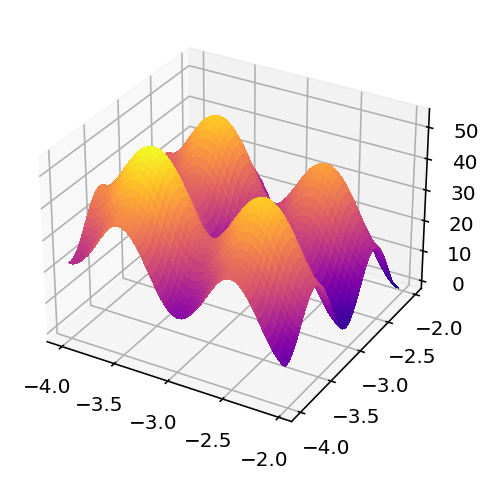

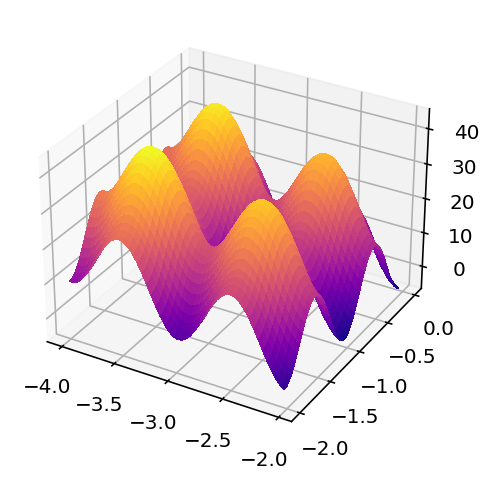

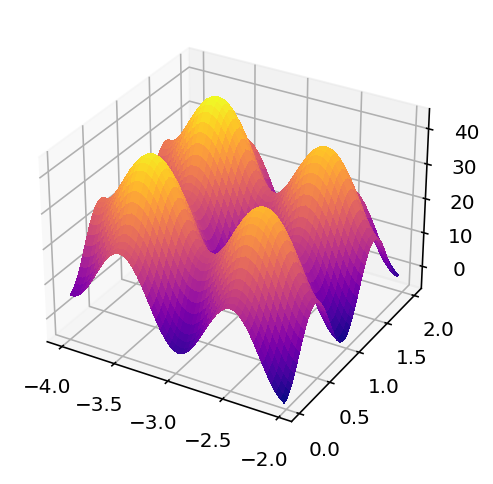

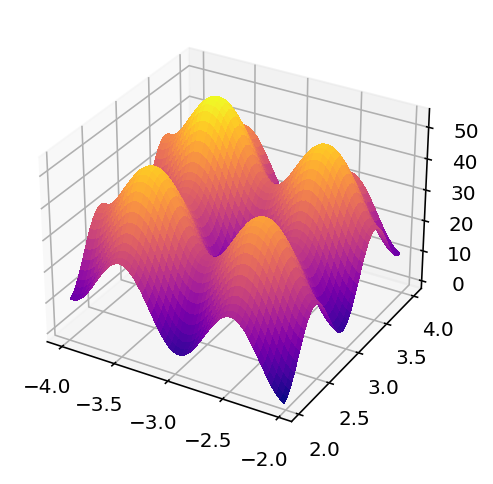

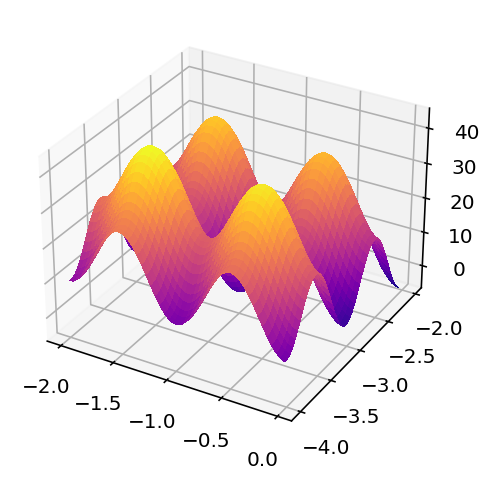

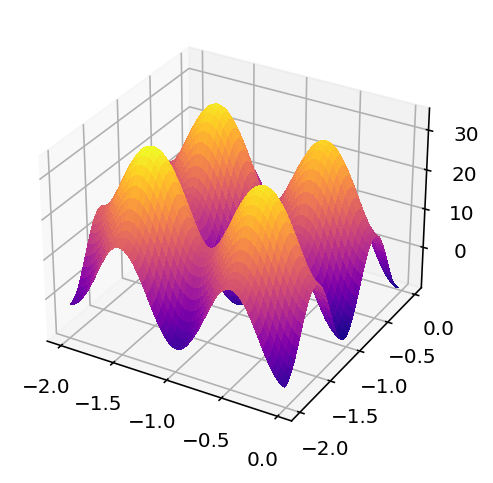

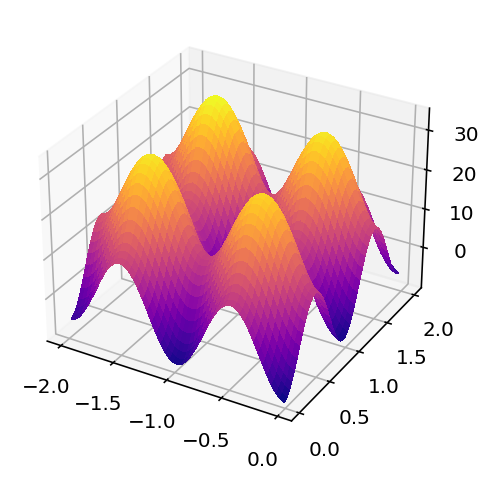

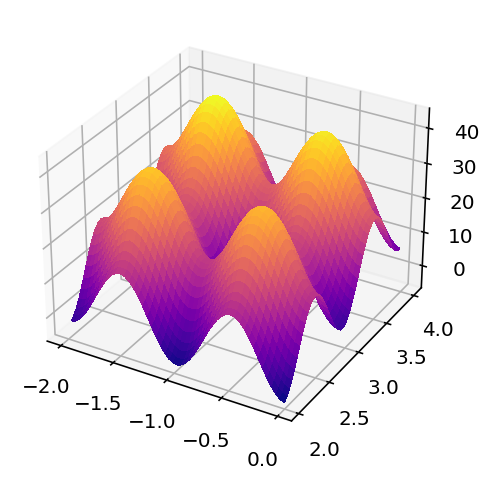

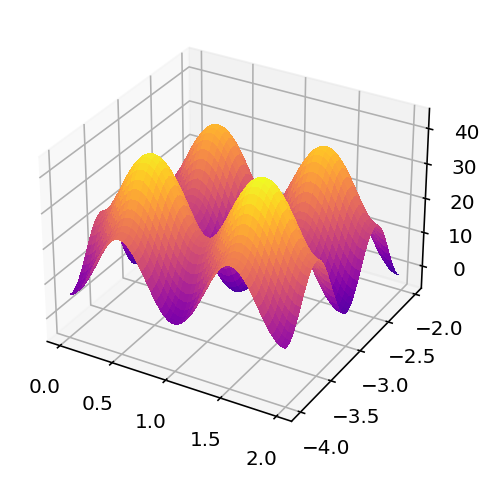

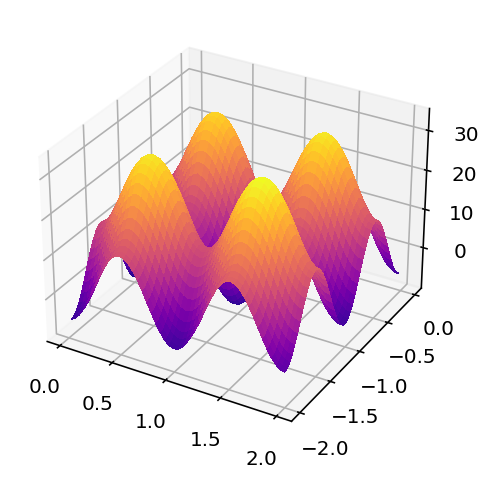

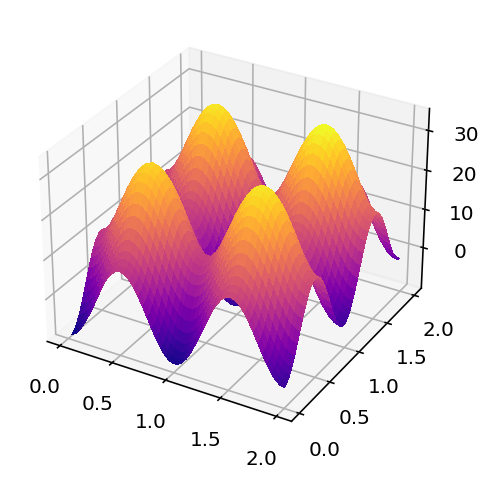

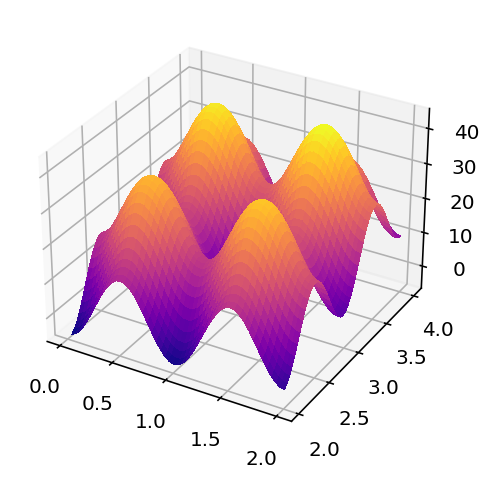

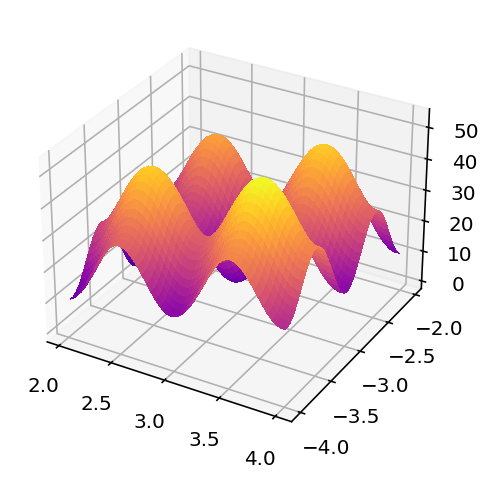

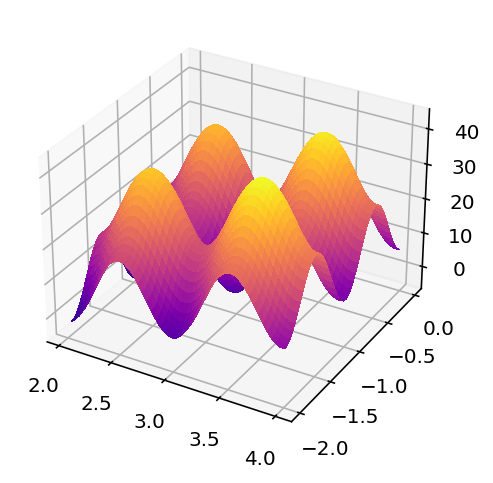

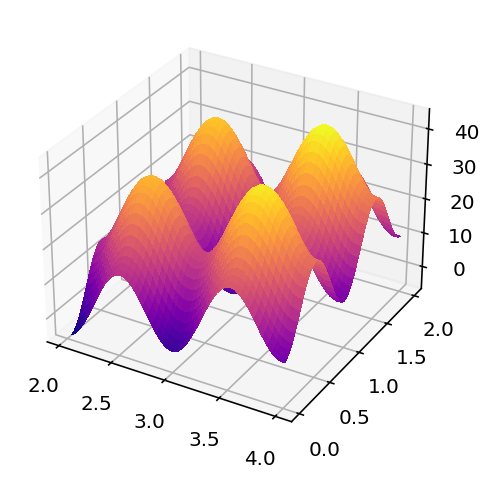

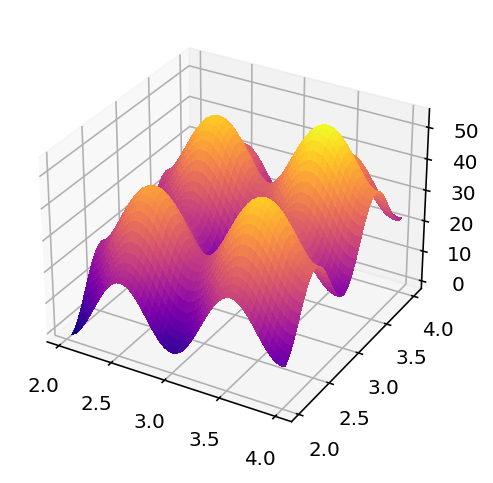

In [114]:
for i in range(len(meshes[0])):
    z = rastrigin((meshes[0][i], meshes[1][i]))
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(meshes[0][i], meshes[1][i], z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)

In [6]:
t = np.arange(0, 65536).reshape(256, 256)
t

array([[    0,     1,     2, ...,   253,   254,   255],
       [  256,   257,   258, ...,   509,   510,   511],
       [  512,   513,   514, ...,   765,   766,   767],
       ...,
       [64768, 64769, 64770, ..., 65021, 65022, 65023],
       [65024, 65025, 65026, ..., 65277, 65278, 65279],
       [65280, 65281, 65282, ..., 65533, 65534, 65535]])

In [8]:
t2 = split_2d(t, (8, 8))
t2.shape

(8, 8, 32, 32)

In [9]:
t2[0][0]

array([[   0,    1,    2, ...,   29,   30,   31],
       [ 256,  257,  258, ...,  285,  286,  287],
       [ 512,  513,  514, ...,  541,  542,  543],
       ...,
       [7424, 7425, 7426, ..., 7453, 7454, 7455],
       [7680, 7681, 7682, ..., 7709, 7710, 7711],
       [7936, 7937, 7938, ..., 7965, 7966, 7967]])

In [90]:
t2.shape

(16, 4, 4)

In [91]:
64 ** 0.5

8.0

In [103]:
t2 = t2.reshape(-1, int(t2.shape[0] ** 0.5), *t2.shape[1:])

In [104]:
t2.shape

(8, 8, 32, 32)

In [110]:
t3 = split_2d(t2[0][0], (8, 8))
t3 = np.array(t3)
t3.shape

(64, 4, 4)

In [58]:
t2[1][0]

array([[2, 3],
       [6, 7]])

In [11]:
x = y = np.linspace(-4, 4, 256)
mg = np.meshgrid(x, y)
meshes = split_mesh(mg, (8, 8))
meshes[0].shape

(8, 8, 32, 32)

In [20]:
meshes[0][0][0], meshes[1][0][0]

array([[-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098],
       [-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098],
       [-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098],
       ...,
       [-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098],
       [-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098],
       [-4.        , -3.96862745, -3.9372549 , ..., -3.09019608,
        -3.05882353, -3.02745098]])

In [207]:
meshes[0][0][0].shape

(32, 32)

In [21]:
t4 = split_mesh((meshes[0][0][0], meshes[1][0][0]))

In [25]:
t4[0].shape

(8, 8, 4, 4)

In [26]:
t4[0][0][0]

array([[-4.        , -3.96862745, -3.9372549 , -3.90588235],
       [-4.        , -3.96862745, -3.9372549 , -3.90588235],
       [-4.        , -3.96862745, -3.9372549 , -3.90588235],
       [-4.        , -3.96862745, -3.9372549 , -3.90588235]])

In [28]:
t5 = split_mesh((t4[0][0][0], t4[1][0][0]), splits=(4, 4))
t5[0].shape

(4, 4, 1, 1)

In [200]:
from itertools import product


def neighbours(cell, size):
    for c in product(*(range(n - 1, n + 2) for n in cell)):
        if c != cell and all(0 <= n < size for n in c):
            yield c


def build_graph(splits):
    graph = {}
    for i in range(splits[0].shape[0]):
        for j in range(splits[0].shape[1]):
            graph[(i, j)] = list(neighbours((i, j), size=splits[0].shape[0]))
    return graph

In [202]:
test = build_graph(meshes)
len(test)

64

In [203]:
test

{(0, 0): [(0, 1), (1, 0), (1, 1)],
 (0, 1): [(0, 0), (0, 2), (1, 0), (1, 1), (1, 2)],
 (0, 2): [(0, 1), (0, 3), (1, 1), (1, 2), (1, 3)],
 (0, 3): [(0, 2), (0, 4), (1, 2), (1, 3), (1, 4)],
 (0, 4): [(0, 3), (0, 5), (1, 3), (1, 4), (1, 5)],
 (0, 5): [(0, 4), (0, 6), (1, 4), (1, 5), (1, 6)],
 (0, 6): [(0, 5), (0, 7), (1, 5), (1, 6), (1, 7)],
 (0, 7): [(0, 6), (1, 6), (1, 7)],
 (1, 0): [(0, 0), (0, 1), (1, 1), (2, 0), (2, 1)],
 (1, 1): [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)],
 (1, 2): [(0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 1), (2, 2), (2, 3)],
 (1, 3): [(0, 2), (0, 3), (0, 4), (1, 2), (1, 4), (2, 2), (2, 3), (2, 4)],
 (1, 4): [(0, 3), (0, 4), (0, 5), (1, 3), (1, 5), (2, 3), (2, 4), (2, 5)],
 (1, 5): [(0, 4), (0, 5), (0, 6), (1, 4), (1, 6), (2, 4), (2, 5), (2, 6)],
 (1, 6): [(0, 5), (0, 6), (0, 7), (1, 5), (1, 7), (2, 5), (2, 6), (2, 7)],
 (1, 7): [(0, 6), (0, 7), (1, 6), (2, 6), (2, 7)],
 (2, 0): [(1, 0), (1, 1), (2, 1), (3, 0), (3, 1)],
 (2, 1): [(1, 0), (1,

In [30]:
d = {'a': 10, 'v': 11}
for k, v in d.items():
    d[k] += 1
d

{'a': 11, 'v': 12}